<center>
    
## Aprendizaje No Supervisado DiploDatos
    Laura Alonso Alemany y Valeria Rulloni
## Agrupamiento con el FIFA 2022 dataset
 
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros... 

###Enunciado
Curso de Aprendizaje NO Supervisado DiploDatos

Valeria Rulloni, Laura Alonso Alemany

Archvos de clases en: https://drive.google.com/drive/folders/1qJ8cYKJz_0-j-f-zvvr9RWFGLRj3H35L

Contenidos:

* Clustering
* Embeddings
* Aprendizaje Semi-Supervisado
* Reglas de Asociación

Utilizar la base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset.

Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

1. Análisis exploratorio de la base.
2. Evaluación visual e intuitiva de a dos variables numéricas por vez.
3. Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros
4. Evaluación y Análisis de los clusters encontrados.
5. Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?
6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

#Primera Parte

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'.** 

In [ ]:
# Cargo datos del 2022
url='https://raw.githubusercontent.com/pablogventura/diplodatos2022/master/05_Aprendizaje_No_Supervisado/players_22.csv'
df=pd.read_csv(url)
df.head(4)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  #Speedster, #Dribbler, #Playmaker, #FK Special...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1    

In [ ]:
df.tail(4)

sofifa_id                                         player_url  \
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                long_name player_positions  overall  \
19235           C. Porter          Caoimhin Porter               CM       47   
19236            N. Logue  Nathan Logue-Cunningham               CM       47   
19237           L. Rudden              Luke Rudden               ST       47   
19238  E. Lalchhanchhuaha  Emanuel Lalchhanchhuaha              CAM       47   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
19235         59   110000.0     500.0   19  2002-03-18        175         70   
19236         55   100000.0     500.0   21  2000-02-07        178         72   
19237         60   110000.0     500.0   19  2002-04-23        173         66   
19238         60   110000.0     500.0   19  2002-02-06        167         61   

       club_team_id            club_name                     league_name  \
19235         445.0           Derry City  Rep. Ireland Airtricity League   
19236      111131.0           Finn Harps  Rep. Ireland Airtricity League   
19237      111131.0           Finn Harps  Rep. Ireland Airtricity League   
19238      113040.0  NorthEast United FC             Indian Super League   

       league_level club_position  club_jersey_number club_loaned_from  \
19235           1.0           RES                27.0              NaN   
19236           1.0           RES                31.0              NaN   
19237           1.0           RES                12.0              NaN   
19238           1.0           SUB                13.0              NaN   

      club_joined  club_contract_valid_until  nationality_id  \
19235  2021-02-22                     2021.0              25   
19236  2021-06-18                     2021.0              25   
19237  2021-06-18                     2021.0              25   
19238  2021-08-31                     2025.0             159   

          nationality_name  nation_team_id nation_position  \
19235  Republic of Ireland             NaN             NaN   
19236  Republic of Ireland             NaN             NaN   
19237  Republic of Ireland             NaN             NaN   
19238                India             NaN             NaN   

       nation_jersey_number preferred_foot  weak_foot  skill_moves  \
19235                   NaN          Right          3            2   
19236                   NaN          Right          3            2   
19237                   NaN          Right          3            2   
19238                   NaN          Right          3            2   

       international_reputation      work_rate       body_type real_face  \
19235                         1  Medium/Medium  Lean (170-185)        No   
19236                         1  Medium/Medium  Lean (170-185)        No   
19237                         1  Medium/Medium  Lean (170-185)        No   
19238                         1  Medium/Medium     Lean (170-)        No   

       release_clause_eur player_tags player_traits  pace  shooting  passing  \
19235            193000.0         NaN           NaN  59.0      39.0     50.0   
19236            175000.0         NaN           NaN  60.0      37.0     45.0   
19237            239000.0         NaN           NaN  68.0      46.0     36.0   
19238            217000.0         NaN           NaN  68.0      38.0     45.0   

       dribbling  defending  physic  attacking_crossing  attacking_finishing  \
19235       46.0       41.0    51.0                  54                   33   
19236       49.0       41.0    52.0                  39                   32   
19237       48.0       15.0    42.0                  29                   49   
19238       

In [ ]:
df.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863179      7.069434   54401.868535      0.747865   
min       16.000000    155.000000     49.000000       1.000000      1.000000   
25%       21.000000    176.000000     70.000000     479.000000      1.000000   
50%       25.000000    181.000000     75.000000    1938.000000      1.000000   
75%       29.000000    186.000000     80.000000  111139.000000      1.000000   
max       54.000000    206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count        19178.000000               19178.000000    19239.000000   
mean            20.945250                2022.764000       58.602682   
std             17.909369                   1.213203       50.298614   
min              1.000000                2021.000000        1.000000   
25%              9.000000                2022.000000       21.000000   
50%             18.000000                2022.000000       45.000000   
75%             27.000000                2024.000000       60.000000   
max             99.000000                2031.000000      219.000000   

       nation_team_id  nation_jersey_number     weak_foot   skill_moves  \
count      759.000000            759.000000  19239.000000  19239.000000   
mean     14480.848485             12.567852      2.946151      2.352461   
std      35328.730217              7.039116      0.671560      0.767659   
min       1318.000000              1.000000      1.000000      1.000000   
25%       1338.000000              7.000000      3.000000      2.000000   
50%       1357.000000             12.000000      3.000000      2.000000   
75%       1386.000000             19.000000      3.000000      3.000000   
max     111473.000000             28.000000      5.000000      5.000000   

       international_reputation  release_clause_eur          pace  \
count              19239.000000        1.806300e+04  17107.000000   
mean                   1.094184        5.374044e+06     68.213071   
std                    0.371098        1.494837e+07     10.933155   
min                    1.000000        1.600000e+04     28.000000   
25%                    1.000000        8.060000e+05     62.000000   
50%                    1.000000        1.600000e+06     69.000000   
75%                    1.000000        3.700000e+06     76.000000   
max                    5.000000        3.735000e+08     97.000000   

           shooting       passing     dribbling     defending        physic  \
count  17107.000000  17107.000000  17107.000000  17107.000000  17107.000000   
mean      52.345297     57.312562     62.561174     51.703630     64.823289   
std       14.051623     10.068965      9.651312     16.189746      9.791886   
min       18.000000     25.000000     27.000000     14.000000     29.000000   
25%       42.000000     51.000000     57.000000     37.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     64.00000

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110


La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

**Realizamos el histograma de la variable "Overall" (Desempeño global)**

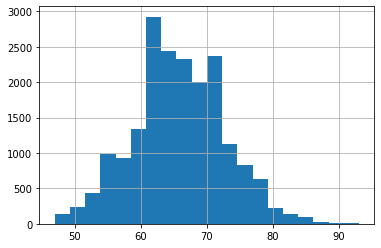

In [ ]:
df['overall'].hist(bins = 20)

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['nation_position'])['overall'].idxmax()][['nation_position','short_name','overall']]
best_players_per_position

nation_position         short_name  overall
116              CAM        M. Sabitzer       84
144               CB            S. Kjær       83
10               CDM           N. Kanté       90
11                CF         K. Benzema       89
88                CM           Jorginho       85
7                 GK           M. Neuer       90
844              LAM     C. Baumgartner       78
50                LB         Jordi Alba       86
15               LCB        V. van Dijk       89
28               LCM    Bruno Fernandes       88
40               LDM        L. Goretzka       87
75                LF          E. Hazard       85
132               LM            L. Sané       84
29                LS         E. Haaland       88
6                 LW          K. Mbappé       91
42               LWB       A. Robertson       87
2663             RAM          L. Schaub       73
62                RB       João Cancelo       86
57               RCB          R. Varane       86
4                RCM       K. De Bruyne       91
19               RDM         J. Kimmich       89
100               RF         D. Mertens       84
89                RM          S. Gnabry       85
1                 RS     R. Lewandowski       92
0                 RW           L. Messi       93
395              RWB            D. Wass       80
2                 ST  Cristiano Ronaldo       91
22               SUB       Sergio Ramos       88

In [ ]:
df['league_level'].value_counts()

1.0    14857
2.0     2513
3.0     1168
4.0      613
5.0       27
Name: league_level, dtype: int64

In [ ]:
df[df["nation_position"]=="SUB"]

sofifa_id                                         player_url  \
22        155862  https://sofifa.com/player/155862/sergio-ramos-...   
30        153079  https://sofifa.com/player/153079/sergio-aguero...   
41        211110  https://sofifa.com/player/211110/paulo-dybala/...   
44        231281  https://sofifa.com/player/231281/trent-alexand...   
45        233049  https://sofifa.com/player/233049/jadon-sancho/...   
51        189509  https://sofifa.com/player/189509/thiago-alcant...   
64        213345  https://sofifa.com/player/213345/kingsley-coma...   
67        231866  https://sofifa.com/player/231866/rodrigo-herna...   
69        143076  https://sofifa.com/player/143076/alejandro-gom...   
78        186942  https://sofifa.com/player/186942/ilkay-gundoga...   
92        230142  https://sofifa.com/player/230142/mikel-oyarzab...   
94        231677  https://sofifa.com/player/231677/marcus-rashfo...   
96        235243  https://sofifa.com/player/235243/matthijs-de-l...   
97         41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
102       183711  https://sofifa.com/player/183711/jordan-hender...   
104       186345  https://sofifa.com/player/186345/kieran-trippi...   
106       193080  https://sofifa.com/player/193080/david-de-gea-...   
111       200458  https://sofifa.com/player/200458/lucas-digne/2...   
118       206517  https://sofifa.com/player/206517/jack-grealish...   
121       208418  https://sofifa.com/player/208418/yannick-carra...   
127       215698  https://sofifa.com/player/215698/mike-maignan/...   
135       228941  https://sofifa.com/player/228941/andre-miguel-...   
142       177413  https://sofifa.com/player/177413/axel-witsel/2...   
148       184432  https://sofifa.com/player/184432/cesar-azpilic...   
154       192563  https://sofifa.com/player/192563/bernd-leno/22...   
160       199845  https://sofifa.com/player/199845/francesco-ace...   
163       201153  https://sofifa.com/player/201153/alvaro-borja-...   
168       204838  https://sofifa.com/player/204838/raul-jimenez/...   
174       211688  https://sofifa.com/player/211688/jose-luis-gay...   
175       213565  https://sofifa.com/player/213565/thomas-lemar/...   
177       214997  https://sofifa.com/player/214997/angel-correa/...   
183       223689  https://sofifa.com/player/223689/wout-weghorst...   
184       223697  https://sofifa.com/player/223697/robin-gosens/...   
197       241486  https://sofifa.com/player/241486/jules-kounde/...   
198       242444  https://sofifa.com/player/242444/joao-felix-se...   
202       168435  https://sofifa.com/player/168435/salvatore-sir...   
211       188943  https://sofifa.com/player/188943/kevin-trapp/2...   
213       190460  https://sofifa.com/player/190460/christian-eri...   
226       199482  https://sofifa.com/player/199482/anthony-lopes...   
229       201519  https://sofifa.com/player/201519/jordan-vereto...   
237       208461  https://sofifa.com/player/208461/marten-de-roo...   
241       210935  https://sofifa.com/player/210935/domenico-bera...   
242       211256  https://sofifa.com/player/211256/nicolas-tagli...   
251       220440  https://sofifa.com/player/220440/clement-lengl...   
253       222077  https://sofifa.com/player/222077/manuel-locate...   
255       224293  https://sofifa.com/player/224293/ruben-diogo-d...   
258       226271  https://sofifa.com/player/226271/fabian-ruiz-p...   
275       234943  https://sofifa.com/player/234943/florian-neuha...   
281       241464  https://sofifa.com/player/241464/pau-francisco...   
288       156519  https://sofifa.com/player/156519/hector-herrer...   
290       163705  https://sofifa.com/player/163705/steve-mandand...   
300       187754  https://sofifa.com/player/187754/marlos-romero...   
317       200888  https://sofifa.com/player/200888/danilo-luis-h...   
323       204311  https://sofifa.com/player/204311/kurt-zouma/22...   
338       210385  https://sofifa.com/player/210385/rui-tiago-dan...   
340       210411  https://sofif

Conteos por posiciones

In [ ]:
pd.DataFrame(df.nation_position.value_counts().sort_index())

nation_position
CAM               10
CB                 6
CDM               16
CF                 1
CM                 2
GK                33
LAM                1
LB                27
LCB               33
LCM               24
LDM                9
LF                 1
LM                15
LS                 7
LW                15
LWB                3
RAM                1
RB                27
RCB               33
RCM               24
RDM                9
RF                 1
RM                15
RS                 7
RW                15
RWB                3
ST                25
SUB              396

Nos llama la atención que la posición "SUB" tenga tantos registros, vamos a explorar ese conjunto por separado para analizar qué tipo de jugadores contiene esta categoría. 

In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143
241    FC Bayern München  78.071429
412    Manchester United  78.000000
509       Real Madrid CF  77.757576
434               Napoli  77.500000
63              Atalanta  77.480000

##3.- Estudiamos el conjunto SUB

Generamos un nuevo DF con los jugadores que tienen nation_position igual a SUB, porque nos llama la atención que sea la mayoría. Queremos entender qué tiene ese conjunto.

**Hipótesis:** Jugadores que no juegan en la selección nacional.

In [ ]:
df_SUB = df.copy()

df_SUB= df[df["nation_position"]=="SUB"]

In [ ]:
df_SUB.head()

sofifa_id                                         player_url  \
22     155862  https://sofifa.com/player/155862/sergio-ramos-...   
30     153079  https://sofifa.com/player/153079/sergio-aguero...   
41     211110  https://sofifa.com/player/211110/paulo-dybala/...   
44     231281  https://sofifa.com/player/231281/trent-alexand...   
45     233049  https://sofifa.com/player/233049/jadon-sancho/...   

             short_name                          long_name player_positions  \
22         Sergio Ramos                Sergio Ramos García               CB   
30            S. Agüero  Sergio Leonel Agüero del Castillo               ST   
41            P. Dybala        Paulo Bruno Exequiel Dybala          CF, CAM   
44  T. Alexander-Arnold             Trent Alexander-Arnold               RB   
45            J. Sancho                       Jadon Sancho       RM, CF, LM   

    overall  potential    value_eur  wage_eur  age         dob  height_cm  \
22       88         88   24000000.0  115000.0   35  1986-03-30        184   
30       87         87   51000000.0  260000.0   33  1988-06-02        173   
41       87         88   93000000.0  160000.0   27  1993-11-15        177   
44       87         92  114000000.0  150000.0   22  1998-10-07        180   
45       87         91  116500000.0  150000.0   21  2000-03-25        180   

    weight_kg  club_team_id            club_name             league_name  \
22         82          73.0  Paris Saint-Germain          French Ligue 1   
30         70         241.0         FC Barcelona  Spain Primera Division   
41         75          45.0             Juventus         Italian Serie A   
44         69           9.0            Liverpool  English Premier League   
45         76          11.0    Manchester United  English Premier League   

    league_level club_position  club_jersey_number club_loaned_from  \
22           1.0           LCB                 4.0              NaN   
30           1.0            ST                19.0              NaN   
41           1.0           CAM                10.0              NaN   
44           1.0            RB                66.0              NaN   
45           1.0            LM                25.0              NaN   

   club_joined  club_contract_valid_until  nationality_id nationality_name  \
22  2021-07-08                     2023.0              45            Spain   
30  2021-07-01                     2023.0              52        Argentina   
41  2015-07-01                     2022.0              52        Argentina   
44  2015-10-07                     2025.0              14          England   
45  2021-07-23                     2026.0              14          England   

    nation_team_id nation_position  nation_jersey_number preferred_foot  \
22          1362.0             SUB                  15.0          Right   
30          1369.0             SUB                   9.0          Right   
41          1369.0             SUB                  21.0           Left   
44          1318.0             SUB                  22.0          Right   
45          1318.0             SUB                  17.0          Right   

    weak_foot  skill_moves  international_reputation      work_rate body_type  \
22          3            3                         4    High/Medium    Unique   
30          4            4                         4    High/Medium    Unique   
41          3            4                         3  Medium/Medium    Unique   
44          4            3                         3    High/Medium    Unique   
45          3            5                         3    High/Medium    Unique   

   real_face  release_clause_eur  \
22       Yes          44400000.0   
30       Yes         104600000.0   
41       Yes         160400000.0   
44       Yes         219500000.0   
45       Yes         224300000.0   

                                          player_tags  \
22  #Aerial Threat, #Tackling, #Tactician, #Comple...   
30   #Dribbler, #Clinical Finisher,

In [ ]:
#Podemos comparar estadísticos entre este y el DF completo

df_SUB.describe()

sofifa_id     overall   potential     value_eur      wage_eur  \
count     396.000000  396.000000  396.000000  3.610000e+02     361.00000   
mean   217833.133838   73.833333   77.078283  1.314132e+07   32292.65928   
std     25193.213556    5.949364    6.422779  1.809639e+07   37307.23113   
min     41236.000000   61.000000   61.000000  1.100000e+05     500.00000   
25%    201541.500000   69.000000   72.000000  1.900000e+06    6000.00000   
50%    221837.000000   73.000000   77.000000  5.000000e+06   21000.00000   
75%    236720.500000   78.000000   82.000000  1.700000e+07   44000.00000   
max    263286.000000   88.000000   92.000000  1.165000e+08  260000.00000   

              age   height_cm   weight_kg   club_team_id  league_level  \
count  396.000000  396.000000  396.000000     361.000000    361.000000   
mean    26.381313  183.095960   77.058081   22654.562327      1.144044   
std      4.137333    6.945785    7.347722   43332.082049      0.466993   
min     17.000000  163.000000   59.000000       1.000000      1.000000   
25%     23.000000  178.000000   72.000000      89.000000      1.000000   
50%     26.000000  183.000000   77.000000     481.000000      1.000000   
75%     29.000000  188.000000   82.000000    1923.000000      1.000000   
max     39.000000  198.000000   95.000000  112511.000000      4.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count          361.000000                 361.000000      396.000000   
mean            18.504155                2023.288089       49.090909   
std             18.023769                   1.271524       47.140639   
min              1.000000                2021.000000        4.000000   
25%              7.000000                2022.000000       22.000000   
50%             15.000000                2023.000000       37.000000   
75%             23.000000                2024.000000       50.000000   
max             99.000000                2027.000000      198.000000   

       nation_team_id  nation_jersey_number   weak_foot  skill_moves  \
count      396.000000            396.000000  396.000000   396.000000   
mean     14480.848485             14.166667    3.108586     2.585859   
std      35350.111531              6.868199    0.733176     0.991203   
min       1318.000000              1.000000    1.000000     1.000000   
25%       1338.000000              9.000000    3.000000     2.000000   
50%       1357.000000             15.000000    3.000000     3.000000   
75%       1386.000000             20.000000    4.000000     3.000000   
max     111473.000000             28.000000    5.000000     5.000000   

       international_reputation  release_clause_eur        pace    shooting  \
count                396.000000        3.450000e+02  330.000000  330.000000   
mean                   1.424242        2.524153e+07   72.324242   61.275758   
std                    0.726927        3.568094e+07   10.570980   13.949312   
min                    1.000000        2.200000e+05   31.000000   24.000000   
25%                    1.000000        3.100000e+06   66.000000   51.000000   
50%                    1.000000        9.600000e+06   73.000000   65.000000   
75%                    2.000000        3.110000e+07   80.000000   72.000000   
max                    5.000000        2.243000e+08   96.000000   89.000000   

          passing   dribbling   defending      physic  attacking_crossing  \
count  330.000000  330.000000  330.000000  330.000000          396.000000   
mean    65.939394   70.336364   57.460606   70.275758           54.393939   
std      9.249462    9.226904   17.161311    8.587810           21.807939   
min     44.000000   41.000000   19.000000   45.000000            8.000000   
25%     60.000000   64.000000   41.000000   66.000000           42.000000   
50%     66.000000   71.000000   62.000000   71.000000           62.000000   
75%     73.000000   77.000000   71.000000   77.000000           70.000000   
max     88.000000   91.000000   8

In [ ]:
#vamos a ver cual es la posicion en la que juega
df_SUB.player_positions.unique()

array(['CB', 'ST', 'CF, CAM', 'RB', 'RM, CF, LM', 'CM, CDM', 'LM, RM, LW',
       'CDM', 'CAM, CF, CM', 'LW, RW', 'LM, ST', 'CDM, CM', 'RB, RWB, RM',
       'GK', 'LB', 'LW, LM, CAM', 'CB, RWB', 'LB, LWB, LM', 'LM, CM, RM',
       'ST, RM', 'LWB, LB, LM', 'CF, ST', 'CM, CAM', 'RW, RM', 'CM',
       'CAM, RM', 'LM, RM, CM', 'ST, LM', 'CF, ST, CAM', 'RW, LW',
       'ST, CF', 'CB, RB, RWB', 'LM, LW, RM', 'RWB, RB', 'CAM, LM, LW',
       'RM', 'RM, LM, LB', 'CAM, CM', 'CAM, LM, RM', 'RB, RM',
       'CB, LB, CDM', 'CDM, CM, CB', 'CM, LM', 'CM, RM', 'RWB, RB, RM',
       'CDM, CB, CM', 'CDM, CM, RM', 'RW, RWB', 'CAM, ST', 'CB, LB',
       'LW, LM', 'RM, RW', 'LW', 'CAM, CM, CF', 'RWB, RM, RB', 'RM, CM',
       'LM, LW, ST', 'CM, CB', 'RM, RW, CM', 'CM, CDM, CAM',
       'CM, RM, CDM', 'LM, CAM', 'CAM, LM', 'LM', 'RM, LM, CAM',
       'ST, LM, RM', 'LM, RM', 'LB, LM', 'CB, RB', 'ST, LW, RW',
       'CB, RB, CDM', 'CF, CAM, ST', 'ST, LM, CAM', 'CAM, CM, RM',
       'LB, LWB', 'LM, RM, RW', '

In [ ]:
#separamos las posiciones en distintas variables 
#cada uno tiene hasta 3 posiciones
#aquellos que tengan menos de 3 se completan con None
df_SUB_separado = df_SUB.copy()

df_SUB_separado[['Pos_1', 'Pos_2', 'Pos_3']] = df_SUB.player_positions.str.split(',',expand=True)

In [ ]:
df_SUB_separado.head()

sofifa_id                                         player_url  \
22     155862  https://sofifa.com/player/155862/sergio-ramos-...   
30     153079  https://sofifa.com/player/153079/sergio-aguero...   
41     211110  https://sofifa.com/player/211110/paulo-dybala/...   
44     231281  https://sofifa.com/player/231281/trent-alexand...   
45     233049  https://sofifa.com/player/233049/jadon-sancho/...   

             short_name                          long_name player_positions  \
22         Sergio Ramos                Sergio Ramos García               CB   
30            S. Agüero  Sergio Leonel Agüero del Castillo               ST   
41            P. Dybala        Paulo Bruno Exequiel Dybala          CF, CAM   
44  T. Alexander-Arnold             Trent Alexander-Arnold               RB   
45            J. Sancho                       Jadon Sancho       RM, CF, LM   

    overall  potential    value_eur  wage_eur  age         dob  height_cm  \
22       88         88   24000000.0  115000.0   35  1986-03-30        184   
30       87         87   51000000.0  260000.0   33  1988-06-02        173   
41       87         88   93000000.0  160000.0   27  1993-11-15        177   
44       87         92  114000000.0  150000.0   22  1998-10-07        180   
45       87         91  116500000.0  150000.0   21  2000-03-25        180   

    weight_kg  club_team_id            club_name             league_name  \
22         82          73.0  Paris Saint-Germain          French Ligue 1   
30         70         241.0         FC Barcelona  Spain Primera Division   
41         75          45.0             Juventus         Italian Serie A   
44         69           9.0            Liverpool  English Premier League   
45         76          11.0    Manchester United  English Premier League   

    league_level club_position  club_jersey_number club_loaned_from  \
22           1.0           LCB                 4.0              NaN   
30           1.0            ST                19.0              NaN   
41           1.0           CAM                10.0              NaN   
44           1.0            RB                66.0              NaN   
45           1.0            LM                25.0              NaN   

   club_joined  club_contract_valid_until  nationality_id nationality_name  \
22  2021-07-08                     2023.0              45            Spain   
30  2021-07-01                     2023.0              52        Argentina   
41  2015-07-01                     2022.0              52        Argentina   
44  2015-10-07                     2025.0              14          England   
45  2021-07-23                     2026.0              14          England   

    nation_team_id nation_position  nation_jersey_number preferred_foot  \
22          1362.0             SUB                  15.0          Right   
30          1369.0             SUB                   9.0          Right   
41          1369.0             SUB                  21.0           Left   
44          1318.0             SUB                  22.0          Right   
45          1318.0             SUB                  17.0          Right   

    weak_foot  skill_moves  international_reputation      work_rate body_type  \
22          3            3                         4    High/Medium    Unique   
30          4            4                         4    High/Medium    Unique   
41          3            4                         3  Medium/Medium    Unique   
44          4            3                         3    High/Medium    Unique   
45          3            5                         3    High/Medium    Unique   

   real_face  release_clause_eur  \
22       Yes          44400000.0   
30       Yes         104600000.0   
41       Yes         160400000.0   
44       Yes         219500000.0   
45       Yes         224300000.0   

                                          player_tags  \
22  #Aerial Threat, #Tackling, #Tactician, #Comple...   
30   #Dribbler, #Clinical Finisher,

In [ ]:
df_SUB_limpio = df_SUB_separado.copy()

#eliminamos columnas que no nos parecen relevantes para clusterizar
#eliminamos "player_positions" por ser redundante (info guardada en Pos_1, Pos_2, Pos_3)
uninteresting_cols =['player_positions', 'player_url', 'sofifa_id', 'long_name',
                     'dob', 'club_loaned_from', 'club_joined', 'work_rate',
                     'body_type', 'real_face', 'player_face_url', 'club_logo_url',
                     'club_flag_url', 'nation_logo_url', 'nation_flag_url']
df_SUB_limpio.drop(uninteresting_cols, inplace=True, axis=1)

In [ ]:
#sobre este DF haremos clustering...

df_SUB_limpio.head()

short_name  overall  potential    value_eur  wage_eur  age  \
22         Sergio Ramos       88         88   24000000.0  115000.0   35   
30            S. Agüero       87         87   51000000.0  260000.0   33   
41            P. Dybala       87         88   93000000.0  160000.0   27   
44  T. Alexander-Arnold       87         92  114000000.0  150000.0   22   
45            J. Sancho       87         91  116500000.0  150000.0   21   

    height_cm  weight_kg  club_team_id            club_name  \
22        184         82          73.0  Paris Saint-Germain   
30        173         70         241.0         FC Barcelona   
41        177         75          45.0             Juventus   
44        180         69           9.0            Liverpool   
45        180         76          11.0    Manchester United   

               league_name  league_level club_position  club_jersey_number  \
22          French Ligue 1           1.0           LCB                 4.0   
30  Spain Primera Division           1.0            ST                19.0   
41         Italian Serie A           1.0           CAM                10.0   
44  English Premier League           1.0            RB                66.0   
45  English Premier League           1.0            LM                25.0   

    club_contract_valid_until  nationality_id nationality_name  \
22                     2023.0              45            Spain   
30                     2023.0              52        Argentina   
41                     2022.0              52        Argentina   
44                     2025.0              14          England   
45                     2026.0              14          England   

    nation_team_id nation_position  nation_jersey_number preferred_foot  \
22          1362.0             SUB                  15.0          Right   
30          1369.0             SUB                   9.0          Right   
41          1369.0             SUB                  21.0           Left   
44          1318.0             SUB                  22.0          Right   
45          1318.0             SUB                  17.0          Right   

    weak_foot  skill_moves  international_reputation  release_clause_eur  \
22          3            3                         4          44400000.0   
30          4            4                         4         104600000.0   
41          3            4                         3         160400000.0   
44          4            3                         3         219500000.0   
45          3            5                         3         224300000.0   

                                          player_tags  \
22  #Aerial Threat, #Tackling, #Tactician, #Comple...   
30   #Dribbler, #Clinical Finisher, #Complete Forward   
41  #Dribbler, #Playmaker, #FK Specialist, #Acroba...   
44                                           #Crosser   
45                                #Dribbler, #Acrobat   

                                        player_traits  pace  shooting  \
22  Injury Prone, Dives Into Tackles (AI), Leaders...  70.0      70.0   
30                       Injury Prone, Chip Shot (AI)  71.0      89.0   
41  Finesse Shot, Flair, Long Shot Taker (AI), Pla...  84.0      86.0   
44  Early Crosser, Long Passer (AI), Long Shot Tak...  79.0      68.0   
45  Finesse Shot, Flair, Playmaker (AI), Technical...  81.0      76.0   

    passing  dribbling  defending  physic  attacking_crossing  \
22     76.0       74.0       88.0    84.0                  66   
30     75.0       87.0       33.0    69.0                  70   
41     86.0       90.0       40.0    60.0                  82   
44     88.0       80.0       80.0    72.0                  92   
45     82.0       91.0       36.0    65.0                  82   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
22                   65                          92                       82   
30                   93                          78                       80

In [ ]:
df_SUB_limpio['league_level'].value_counts()

1.0    323
2.0     27
3.0      8
4.0      3
Name: league_level, dtype: int64

Con este análisis podemos ver que casi el 90% de los jugadores con nation_position = "SUB" tienen como valor asignado al "nivel" (league_level) 1; y no hay ningún jugador con League_level = 5.

Para entender esta categoría y distinguir si 1 es un valor que denota "de primer nivel" (jugador de buen nivel) o denota el peor nivel (si fuera una escala numérica en la que los peores tienen el nivel más bajo), miramos la asignación para Messi y tiene asignado nivel = 1 (es decir, tener 'league_level' = 1 corresponde a un buen nivel)...

De ser correcta esta interpretación podría invalidar nuestra hipótesis (que los jugadores en este conjunto no están dentro del plantel de los que participan de la selección nacional de sus países), ya que la mayoría son jugadores de primer nivel.

###K-Means para SUB

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [ ]:
skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [ ]:
df_nuevo_SUB = df_SUB_limpio.copy()


In [ ]:
#Miramos correlación entre variables (dificil ver)

#corr_df = df_nuevo_SUB[skills_ratings].corr()

#sns.heatmap(corr_df, annot=True)
#plt.show()

In [ ]:
# Número de clusters buscado
n_clust = 2

km = KMeans(n_clusters=n_clust)
km.fit(df_nuevo_SUB[skills_ratings]) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  1885010.3515151516


In [ ]:
#agregamos la columna k_means con las etiquetas de los clusters encontrados

df_SUB_clusters=df_nuevo_SUB.copy()
df_SUB_clusters['kmeans_2'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters (nosotres forzamos la cantidad)')
df_SUB_clusters.head()

Kmeans encontró:  2 clusters, nosotros forzamos la cantidad


short_name  overall  potential    value_eur  wage_eur  age  \
22         Sergio Ramos       88         88   24000000.0  115000.0   35   
30            S. Agüero       87         87   51000000.0  260000.0   33   
41            P. Dybala       87         88   93000000.0  160000.0   27   
44  T. Alexander-Arnold       87         92  114000000.0  150000.0   22   
45            J. Sancho       87         91  116500000.0  150000.0   21   

    height_cm  weight_kg  club_team_id            club_name  \
22        184         82          73.0  Paris Saint-Germain   
30        173         70         241.0         FC Barcelona   
41        177         75          45.0             Juventus   
44        180         69           9.0            Liverpool   
45        180         76          11.0    Manchester United   

               league_name  league_level club_position  club_jersey_number  \
22          French Ligue 1           1.0           LCB                 4.0   
30  Spain Primera Division           1.0            ST                19.0   
41         Italian Serie A           1.0           CAM                10.0   
44  English Premier League           1.0            RB                66.0   
45  English Premier League           1.0            LM                25.0   

    club_contract_valid_until  nationality_id nationality_name  \
22                     2023.0              45            Spain   
30                     2023.0              52        Argentina   
41                     2022.0              52        Argentina   
44                     2025.0              14          England   
45                     2026.0              14          England   

    nation_team_id nation_position  nation_jersey_number preferred_foot  \
22          1362.0             SUB                  15.0          Right   
30          1369.0             SUB                   9.0          Right   
41          1369.0             SUB                  21.0           Left   
44          1318.0             SUB                  22.0          Right   
45          1318.0             SUB                  17.0          Right   

    weak_foot  skill_moves  international_reputation  release_clause_eur  \
22          3            3                         4          44400000.0   
30          4            4                         4         104600000.0   
41          3            4                         3         160400000.0   
44          4            3                         3         219500000.0   
45          3            5                         3         224300000.0   

                                          player_tags  \
22  #Aerial Threat, #Tackling, #Tactician, #Comple...   
30   #Dribbler, #Clinical Finisher, #Complete Forward   
41  #Dribbler, #Playmaker, #FK Specialist, #Acroba...   
44                                           #Crosser   
45                                #Dribbler, #Acrobat   

                                        player_traits  pace  shooting  \
22  Injury Prone, Dives Into Tackles (AI), Leaders...  70.0      70.0   
30                       Injury Prone, Chip Shot (AI)  71.0      89.0   
41  Finesse Shot, Flair, Long Shot Taker (AI), Pla...  84.0      86.0   
44  Early Crosser, Long Passer (AI), Long Shot Tak...  79.0      68.0   
45  Finesse Shot, Flair, Playmaker (AI), Technical...  81.0      76.0   

    passing  dribbling  defending  physic  attacking_crossing  \
22     76.0       74.0       88.0    84.0                  66   
30     75.0       87.0       33.0    69.0                  70   
41     86.0       90.0       40.0    60.0                  82   
44     88.0       80.0       80.0    72.0                  92   
45     82.0       91.0       36.0    65.0                  82   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
22                   65                          92                       82   
30                   93                          78                       80

In [ ]:
#graficamos

#bool_crack=df_nuevo_SUB["league_level"] > 2
#bool_no_crack=df_nuevo_SUB["league_level"]< 3

bool_crack=df_nuevo_SUB["overall"] > 85
bool_no_crack=df_nuevo_SUB["overall"]< 86

#Elijo dos números entre 0 y  de n_skills-1
#12 y 18 son skills poco correlacionadas, nube de puntos alejados
skill_1=skills_ratings[10]
skill_2=skills_ratings[11]
print(skill_1, skill_2)

movement_acceleration movement_sprint_speed


In [ ]:
kmean_clusters = go.Scatter(x=df_nuevo_SUB[skill_1], y=df_nuevo_SUB[skill_2],
                           mode='markers',
                        text=df_nuevo_SUB.loc[:,'Pos_1'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_nuevo_SUB.loc[bool_crack,skill_1], y=df_nuevo_SUB.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_nuevo_SUB.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')


data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means - SUB",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show(renderer="colab")

In [ ]:
df_SUB_clusters['kmeans_2'].value_counts()

0    330
1     66
Name: kmeans_2, dtype: int64

In [ ]:
df_SUB_clusters['Pos_1'].value_counts()

GK     66
CB     65
ST     52
CM     47
CAM    29
CDM    27
LM     23
RB     21
LB     18
LW     14
RM     13
RW      7
CF      5
LWB     5
RWB     4
Name: Pos_1, dtype: int64

In [ ]:
df_SUB_clusters[df_SUB_clusters['kmeans_2']==0]['Pos_1'].value_counts()

CB     65
ST     52
CM     47
CAM    29
CDM    27
LM     23
RB     21
LB     18
LW     14
RM     13
RW      7
CF      5
LWB     5
RWB     4
Name: Pos_1, dtype: int64

Con este análisis podemos concluir que K-Means con k=2 clusters separa, dentro de este conjunto de jugadores con posición "SUB" al conjunto de arqueros (GK).
Vimos que hay 66 registros en el cluster 0 y también hay 66 registros de arqueros en este subconjunto. Finalmente validamos que son los mismos 66 registros.

Por ende, K-Means (k=2) reconoce y separa bien los arqueros del resto de los jugadores.

In [ ]:
#IDEA: eliminamos del conjunto SUB los GK y clusterizamos el resto

df_SUB_sin_GK = df_SUB_clusters[df_SUB_clusters['Pos_1']!= 'GK']

df_SUB_sin_GK.describe()

overall   potential     value_eur      wage_eur         age  \
count  330.000000  330.000000  3.000000e+02     300.00000  330.000000   
mean    73.887879   77.363636  1.437783e+07   34996.50000   25.878788   
std      6.041611    6.499091  1.906800e+07   39184.57796    3.958428   
min     61.000000   61.000000  3.250000e+05     500.00000   17.000000   
25%     69.000000   73.000000  2.100000e+06    7000.00000   23.000000   
50%     73.000000   78.000000  6.000000e+06   22500.00000   26.000000   
75%     78.000000   82.000000  1.850000e+07   48500.00000   29.000000   
max     88.000000   92.000000  1.165000e+08  260000.00000   39.000000   

        height_cm   weight_kg   club_team_id  league_level  \
count  330.000000  330.000000     300.000000    300.000000   
mean   181.721212   75.539394   21777.030000      1.150000   
std      6.549868    6.707521   42748.547138      0.470714   
min    163.000000   59.000000       1.000000      1.000000   
25%    177.000000   70.250000      86.000000      1.000000   
50%    182.000000   76.000000     453.000000      1.000000   
75%    186.000000   80.000000    1917.500000      1.000000   
max    197.000000   95.000000  112511.000000      4.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count          300.000000                 300.000000      330.000000   
mean            17.980000                2023.300000       49.090909   
std             16.230765                   1.263059       47.152578   
min              2.000000                2021.000000        4.000000   
25%              8.000000                2022.000000       22.000000   
50%             15.000000                2023.000000       37.000000   
75%             23.000000                2024.000000       50.000000   
max             99.000000                2027.000000      198.000000   

       nation_team_id  nation_jersey_number   weak_foot  skill_moves  \
count      330.000000            330.000000  330.000000    330.00000   
mean     14480.848485             14.218182    3.209091      2.90303   
std      35359.064326              6.791800    0.707263      0.75773   
min       1318.000000              2.000000    1.000000      2.00000   
25%       1338.000000              9.000000    3.000000      2.00000   
50%       1357.000000             15.000000    3.000000      3.00000   
75%       1386.000000             19.000000    4.000000      3.00000   
max     111473.000000             28.000000    5.000000      5.00000   

       international_reputation  release_clause_eur        pace    shooting  \
count                330.000000        2.840000e+02  330.000000  330.000000   
mean                   1.439394        2.781934e+07   72.324242   61.275758   
std                    0.734077        3.777323e+07   10.570980   13.949312   
min                    1.000000        5.000000e+05   31.000000   24.000000   
25%                    1.000000        3.800000e+06   66.000000   51.000000   
50%                    1.000000        1.115000e+07   73.000000   65.000000   
75%                    2.000000        3.842500e+07   80.000000   72.000000   
max                    5.000000        2.243000e+08   96.000000   89.000000   

          passing   dribbling   defending      physic  attacking_crossing  \
count  330.000000  330.000000  330.000000  330.000000          330.000000   
mean    65.939394   70.336364   57.460606   70.275758           62.475758   
std      9.249462    9.226904   17.161311    8.587810           13.273635   
min     44.000000   41.000000   19.000000   45.000000           25.000000   
25%     60.000000   64.000000   41.000000   66.000000           55.000000   
50%     66.000000   71.000000   62.000000   71.000000           65.000000   
75%     73.000000   77.000000   71.000000   77.000000           72.000000   
max     88.000000   91.000000   88.000000   87.000000           92.000000   

       attacking_finishing  attacking_heading_accuracy  \
count           330.000000     

In [ ]:
# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_SUB_sin_GK[skills_ratings]) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  906106.3190909091


In [ ]:
#agregamos la columna k_means con las etiquetas de los clusters encontrados

df_SUB_clusters_sin_GK=df_SUB_sin_GK.copy()
df_SUB_clusters_sin_GK['kmeans_3'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters (nosotres forzamos la cantidad)')
df_SUB_clusters.head()

Kmeans encontró:  3 clusters (nosotres forzamos la cantidad)


short_name  overall  potential    value_eur  wage_eur  age  \
22         Sergio Ramos       88         88   24000000.0  115000.0   35   
30            S. Agüero       87         87   51000000.0  260000.0   33   
41            P. Dybala       87         88   93000000.0  160000.0   27   
44  T. Alexander-Arnold       87         92  114000000.0  150000.0   22   
45            J. Sancho       87         91  116500000.0  150000.0   21   

    height_cm  weight_kg  club_team_id            club_name  \
22        184         82          73.0  Paris Saint-Germain   
30        173         70         241.0         FC Barcelona   
41        177         75          45.0             Juventus   
44        180         69           9.0            Liverpool   
45        180         76          11.0    Manchester United   

               league_name  league_level club_position  club_jersey_number  \
22          French Ligue 1           1.0           LCB                 4.0   
30  Spain Primera Division           1.0            ST                19.0   
41         Italian Serie A           1.0           CAM                10.0   
44  English Premier League           1.0            RB                66.0   
45  English Premier League           1.0            LM                25.0   

    club_contract_valid_until  nationality_id nationality_name  \
22                     2023.0              45            Spain   
30                     2023.0              52        Argentina   
41                     2022.0              52        Argentina   
44                     2025.0              14          England   
45                     2026.0              14          England   

    nation_team_id nation_position  nation_jersey_number preferred_foot  \
22          1362.0             SUB                  15.0          Right   
30          1369.0             SUB                   9.0          Right   
41          1369.0             SUB                  21.0           Left   
44          1318.0             SUB                  22.0          Right   
45          1318.0             SUB                  17.0          Right   

    weak_foot  skill_moves  international_reputation  release_clause_eur  \
22          3            3                         4          44400000.0   
30          4            4                         4         104600000.0   
41          3            4                         3         160400000.0   
44          4            3                         3         219500000.0   
45          3            5                         3         224300000.0   

                                          player_tags  \
22  #Aerial Threat, #Tackling, #Tactician, #Comple...   
30   #Dribbler, #Clinical Finisher, #Complete Forward   
41  #Dribbler, #Playmaker, #FK Specialist, #Acroba...   
44                                           #Crosser   
45                                #Dribbler, #Acrobat   

                                        player_traits  pace  shooting  \
22  Injury Prone, Dives Into Tackles (AI), Leaders...  70.0      70.0   
30                       Injury Prone, Chip Shot (AI)  71.0      89.0   
41  Finesse Shot, Flair, Long Shot Taker (AI), Pla...  84.0      86.0   
44  Early Crosser, Long Passer (AI), Long Shot Tak...  79.0      68.0   
45  Finesse Shot, Flair, Playmaker (AI), Technical...  81.0      76.0   

    passing  dribbling  defending  physic  attacking_crossing  \
22     76.0       74.0       88.0    84.0                  66   
30     75.0       87.0       33.0    69.0                  70   
41     86.0       90.0       40.0    60.0                  82   
44     88.0       80.0       80.0    72.0                  92   
45     82.0       91.0       36.0    65.0                  82   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
22                   65                          92                       82   
30                   93                          78                       80

In [ ]:
#graficamos

#bool_crack=df_nuevo_SUB["league_level"] > 2
#bool_no_crack=df_nuevo_SUB["league_level"]< 3

bool_crack=df_nuevo_SUB["overall"] > 85
bool_no_crack=df_nuevo_SUB["overall"]< 86

#Elijo dos números entre 0 y  de n_skills-1
#12 y 18 son skills poco correlacionadas, nube de puntos alejados
skill_1=skills_ratings[12]
skill_2=skills_ratings[18]
print(skill_1, skill_2)

movement_agility power_strength


In [ ]:
kmean_clusters = go.Scatter(x=df_SUB_sin_GK[skill_1], y=df_SUB_sin_GK[skill_2],
                           mode='markers',
                        text=df_SUB_sin_GK.loc[:,'Pos_1'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_SUB_sin_GK.loc[bool_crack,skill_1], y=df_SUB_sin_GK.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_SUB_sin_GK.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')


data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means - SUB sin GK",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show(renderer="colab")

Con las distintas pruebas que hicimos, imprimiendo distintas versiones del scatterplot (alternando las dos variables a graficar), no logramos distinguir alguna característica común dentro de cada uno de los clusters encontrados por KMeans con k=3 en este conjunto SUB *sin los arqueros*.

Opciones para profundizar este análisis:<br>
- Podríamos elegir otro(s) valor(es) para k, modificando la cantidad de clusters que le pedimos que encuentre al algoritmo;
- Podríamos seguir indagando con distintas características "ancla" que nos brinden una información distinta a las que ya exploramos (en este caso usamos la primera posición listada del jugador en la variable "player_positions").
- Probar otros algoritmos de clusterización.

## 4.-Preparación-de-los-datos

**Retiramos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño de la base**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [ ]:
# Reducimos la base a jugadores con overall mayor a 70
df_n=df[(df['overall']>70)]

In [ ]:
df_n

sofifa_id                                         player_url  \
0        158023  https://sofifa.com/player/158023/lionel-messi/...   
1        188545  https://sofifa.com/player/188545/robert-lewand...   
2         20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3        190871  https://sofifa.com/player/190871/neymar-da-sil...   
4        192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...         ...                                                ...   
4588     261987  https://sofifa.com/player/261987/antonio-blanc...   
4589     262411  https://sofifa.com/player/262411/miguel-crespo...   
4590     262815  https://sofifa.com/player/262815/giannis-kotsi...   
4591     263230  https://sofifa.com/player/263230/milutin-osmaj...   
4592     263383  https://sofifa.com/player/263383/stjepan-lonca...   

             short_name                            long_name player_positions  \
0              L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1        R. Lewandowski                   Robert Lewandowski               ST   
2     Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3             Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4          K. De Bruyne                      Kevin De Bruyne          CM, CAM   
...                 ...                                  ...              ...   
4588             Blanco                 Antonio Blanco Conde          CM, CDM   
4589      Miguel Crespo               Miguel Crespo da Silva               CM   
4590        G. Kotsiras                     Giannis Kotsiras           RB, RM   
4591         M. Osmajić                      Milutin Osmajić       ST, LM, RM   
4592          S. Lončar                       Stjepan Lončar         CDM, CAM   

      overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0          93         93   78000000.0  320000.0   34  1987-06-24        170   
1          92         92  119500000.0  270000.0   32  1988-08-21        185   
2          91         91   45000000.0  270000.0   36  1985-02-05        187   
3          91         91  129000000.0  270000.0   29  1992-02-05        175   
4          91         91  125500000.0  350000.0   30  1991-06-28        181   
...       ...        ...          ...       ...  ...         ...        ...   
4588       71         83    4500000.0   51000.0   20  2000-07-23        176   
4589       71         76    2800000.0   24000.0   24  1996-09-11        183   
4590       71         71    1700000.0     600.0   28  1992-12-16        183   
4591       71         81    4200000.0   15000.0   21  1999-07-25        185   
4592       71         79    3900000.0     550.0   24  1996-11-10        187   

      weight_kg  club_team_id            club_name  \
0            72          73.0  Paris Saint-Germain   
1            81          21.0    FC Bayern München   
2            83          11.0    Manchester United   
3            68          73.0  Paris Saint-Germain   
4            70          10.0      Manchester City   
...         ...           ...                  ...   
4588         68         243.0       Real Madrid CF   
4589         78         326.0        Fenerbahçe SK   
4590         77        1884.0     Panathinaikos FC   
4591         76        1968.0             Cádiz CF   
4592         74        1874.0      Ferencvárosi TC   

                        league_name  league_level club_position  \
0                    French Ligue 1           1.0            RW   
1              German 1. Bundesliga           1.0            ST   
2            English Premier League           1.0            ST   
3                    French Ligue 1           1.0            LW   
4            English Premier League           1.0           RCM   
...                             ...           ...           ...   
4588         Spain Primera Division           1.0           RES   
4589              Turkish Süper Lig           1.0         

**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [ ]:
skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [ ]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n = df_n.append(MachineGunDict,ignore_index=True)

In [ ]:
df_n

sofifa_id                                         player_url  \
0      158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1      188545.0  https://sofifa.com/player/188545/robert-lewand...   
2       20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3      190871.0  https://sofifa.com/player/190871/neymar-da-sil...   
4      192985.0  https://sofifa.com/player/192985/kevin-de-bruy...   
...         ...                                                ...   
4589   262411.0  https://sofifa.com/player/262411/miguel-crespo...   
4590   262815.0  https://sofifa.com/player/262815/giannis-kotsi...   
4591   263230.0  https://sofifa.com/player/263230/milutin-osmaj...   
4592   263383.0  https://sofifa.com/player/263383/stjepan-lonca...   
4593        NaN                                                NaN   

             short_name                            long_name player_positions  \
0              L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1        R. Lewandowski                   Robert Lewandowski               ST   
2     Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3             Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4          K. De Bruyne                      Kevin De Bruyne          CM, CAM   
...                 ...                                  ...              ...   
4589      Miguel Crespo               Miguel Crespo da Silva               CM   
4590        G. Kotsiras                     Giannis Kotsiras           RB, RM   
4591         M. Osmajić                      Milutin Osmajić       ST, LM, RM   
4592          S. Lončar                       Stjepan Lončar         CDM, CAM   
4593         MachineGun                                  NaN              NaN   

      overall  potential    value_eur  wage_eur   age         dob  height_cm  \
0          93       93.0   78000000.0  320000.0  34.0  1987-06-24      170.0   
1          92       92.0  119500000.0  270000.0  32.0  1988-08-21      185.0   
2          91       91.0   45000000.0  270000.0  36.0  1985-02-05      187.0   
3          91       91.0  129000000.0  270000.0  29.0  1992-02-05      175.0   
4          91       91.0  125500000.0  350000.0  30.0  1991-06-28      181.0   
...       ...        ...          ...       ...   ...         ...        ...   
4589       71       76.0    2800000.0   24000.0  24.0  1996-09-11      183.0   
4590       71       71.0    1700000.0     600.0  28.0  1992-12-16      183.0   
4591       71       81.0    4200000.0   15000.0  21.0  1999-07-25      185.0   
4592       71       79.0    3900000.0     550.0  24.0  1996-11-10      187.0   
4593       99        NaN          NaN       NaN   NaN         NaN        NaN   

      weight_kg  club_team_id            club_name  \
0          72.0          73.0  Paris Saint-Germain   
1          81.0          21.0    FC Bayern München   
2          83.0          11.0    Manchester United   
3          68.0          73.0  Paris Saint-Germain   
4          70.0          10.0      Manchester City   
...         ...           ...                  ...   
4589       78.0         326.0        Fenerbahçe SK   
4590       77.0        1884.0     Panathinaikos FC   
4591       76.0        1968.0             Cádiz CF   
4592       74.0        1874.0      Ferencvárosi TC   
4593        NaN           NaN                  NaN   

                        league_name  league_level club_position  \
0                    French Ligue 1           1.0            RW   
1              German 1. Bundesliga           1.0            ST   
2            English Premier League           1.0            ST   
3                    French Ligue 1           1.0            LW   
4            English Premier League           1.0           RCM   
...                             ...           ...           ...   
4589              Turkish Süper Lig           1.0           SUB   
4590             Greek Super League           

In [ ]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
df_skills.head(4)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  71                   95                          90   
2                  87                   95                          90   
3                  85                   83                          63   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       85                 89               85           79   
2                       80                 86               88           81   
3                       86                 86               95           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  91                  96   
1                 85                  70                  88   
2                 84                  77                  88   
3                 87                  81                  95   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     77                     79                77   
2                     85                     88                86   
3                     93                     89                96   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  93                82                90             85   
2                  94                74                94             95   
3                  89                84                80             64   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             76              86                87                    81   
2             77              77                93                    63   
3             81              53                81                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   
3                       37                     86                90   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   
3                   93                   93                           35   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                         42                        19                  15   
2                         32                        24                   7   
3                         32                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                     6                   12                        8   
2                    11                   15                       14   
3                     9                   15                       15   

   goalkeeping_reflexes  
0                     8  
1                    10  
2                    11  
3                    11

## 5.-Exploratorio-Visual-para-Clustering

Visualizamos los datos de a dos variables numéricas

**Consigna de trabajo en grupo:** buscar agrupamiento de datos usando las variables en skill_ratings de a pares

In [ ]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

# Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[25]

Gráfica con matplotlib.pyplot, liviana pero más sencilla

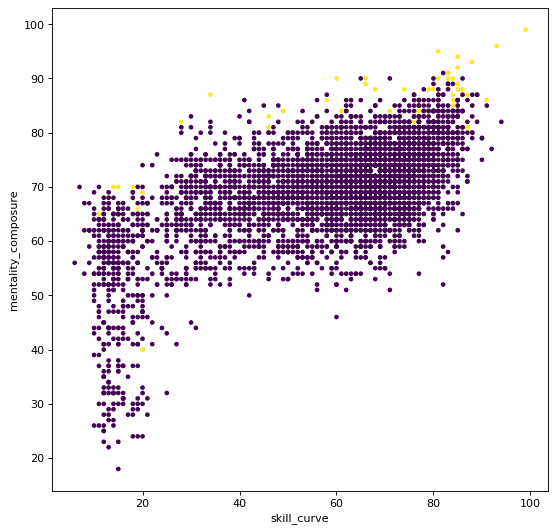

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=10,c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
%%script echo skipping
#En Jupyter Ntb abre en otra ventana, 
plot(fig)

skipping


In [ ]:
%%script echo skipping
#en Jupyter Ntb, abre en la ntb
#iplot(fig)

skipping


**Consigna de trabajo en grupo:** buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios bidimensionales, de a dos variables por vez) y si se encuentran, tratar de explicarlos visualmente con alguna característica.

En próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [ ]:
#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 

bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club_name"]=='Paris Saint-Germain' 
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]  #6
skill_2=skills_ratings[25]  #25

Gráfica con plotly

In [ ]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           text=df_n.loc[bool_machinegun,'short_name'],
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')

joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
%%script echo skipping

#En Jupyter ntb
plot(fig) #abre y muestra en otra pestaña
#iplot(fig)  #muestra aquí

skipping


**Identifiquemos algunos jugadores por nombre**

In [ ]:
print(df_n.loc[0:43,"short_name"])

0              L. Messi
1        R. Lewandowski
2     Cristiano Ronaldo
3             Neymar Jr
4          K. De Bruyne
5              J. Oblak
6             K. Mbappé
7              M. Neuer
8         M. ter Stegen
9               H. Kane
10             N. Kanté
11           K. Benzema
12          T. Courtois
13               H. Son
14             Casemiro
15          V. van Dijk
16              S. Mané
17             M. Salah
18              Ederson
19           J. Kimmich
20              Alisson
21        G. Donnarumma
22         Sergio Ramos
23            L. Suárez
24             T. Kroos
25            R. Lukaku
26             K. Navas
27          R. Sterling
28      Bruno Fernandes
29           E. Haaland
30            S. Agüero
31            H. Lloris
32            L. Modrić
33          Á. Di María
34          W. Szczęsny
35            T. Müller
36          C. Immobile
37             P. Pogba
38          M. Verratti
39           Marquinhos
40          L. Goretzka
41            P.

#Segunda Parte



## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [ ]:
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth
from sklearn import decomposition

## 2.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


Como primera prueba de elección de hiperparametros estudiamos realizar el clustering con una cardinalidad de clusters de 2 (n_clust = 2). La hipotesis es que con dicho hiperparametro deberían quedar separados los arqueros del resto de los jugadores (defensores, mediocampistas, atacantes, etc.).

In [ ]:
# Número de clusters buscado
n_clust = 2

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  22782457.193424504


In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  2 clusters, nosotros forzamos la cantidad


sofifa_id                                         player_url  \
0   158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1   188545.0  https://sofifa.com/player/188545/robert-lewand...   
2    20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3   190871.0  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   

   overall  potential    value_eur  wage_eur   age         dob  height_cm  \
0       93       93.0   78000000.0  320000.0  34.0  1987-06-24      170.0   
1       92       92.0  119500000.0  270000.0  32.0  1988-08-21      185.0   
2       91       91.0   45000000.0  270000.0  36.0  1985-02-05      187.0   
3       91       91.0  129000000.0  270000.0  29.0  1992-02-05      175.0   

   weight_kg  club_team_id            club_name             league_name  \
0       72.0          73.0  Paris Saint-Germain          French Ligue 1   
1       81.0          21.0    FC Bayern München    German 1. Bundesliga   
2       83.0          11.0    Manchester United  English Premier League   
3       68.0          73.0  Paris Saint-Germain          French Ligue 1   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0            52.0        Argentina   
1  2014-07-01                     2023.0            37.0           Poland   
2  2021-08-27                     2023.0            38.0         Portugal   
3  2017-08-03                     2025.0            54.0           Brazil   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0        4.0          4.0                       5.0   Medium/Low    Unique   
1        4.0          4.0                       5.0  High/Medium    Unique   
2        4.0          5.0                       5.0     High/Low    Unique   
3        5.0          5.0                       5.0  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  #Speedster, #Dribbler, #Playmaker, #FK Special...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   


**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[25]
print(skill_1, skill_2)

skill_curve mentality_composure


In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab:
fig.show(renderer="colab")

Confirmamos que uno de los clusters (rojo en la figura) se corresponde con los arqueros mientras que el otro de los clusters (azul en la figura) captura los jugadores del resto de las posiciones.

In [ ]:
%%script echo skipping
#En Jupyter:
#iplot(fig)
plot(fig)

skipping


Continuamos configurando un numero de clusters mayor (n_clust =5 )

In [ ]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  10592894.355368288


In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
#df_clusters.head(4)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[25]
print(skill_1, skill_2)

skill_curve mentality_composure


In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab:
fig.show(renderer="colab")

**ANÁLISIS**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster  
- Tabla de contingencia: alguna categórica vs clusters para ver posible asociación


In [ ]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34   
1                   ST       92         92  119500000.0  270000.0   32   
2               ST, LW       91         91   45000000.0  270000.0   36   
3              LW, CAM       91         91  129000000.0  270000.0   29   
4              CM, CAM       91         91  125500000.0  350000.0   30   
...                ...      ...        ...          ...       ...  ...   
19234              CDM       47         52      70000.0    1000.0   22   
19235               CM       47         59     110000.0     500.0   19   
19236               CM       47         55     100000.0     500.0   21   
19237               ST       47         60     110000.0     500.0   19   
19238              CAM       47         60     110000.0     500.0   19   

              dob  height_cm  weight_kg  club_team_id            club_name  \
0      1987-06-24        170         72          73.0  Paris Saint-Germain   
1      1988-08-21        185         81          21.0    FC Bayern München   
2      1985-02-05        187         83          11.0    Manchester United   
3      1992-02-05        175         68          73.0  Paris Saint-Germain   
4      1991-06-28        181         70          10.0      Manchester City   
...           ...        ...        ...           ...                  ...   
19234  1999-01-02        180         64      112541.0             Wuhan FC   
19235  2002-03-18        175         70         445.0           Derry City   
19236  2000-02-07        178         72      111131.0           Finn Harps   
19237  2002-04-23        173         66      111131.0           Finn Harps   
19238  2002-02-06        167         61      113040.0  NorthEast United FC   

                          league_name  league_level club_position  \
0                      French Ligue 1           1.0            RW   
1                German 1. Bundesliga           1.0            ST   
2              English Premier League           1.0            ST   
3                      French Ligue 1           1.0            LW   
4              English Premier League           1.0           RCM   
...                               ...           ...           ...   
19234            Chinese Super League           1.0 

In [ ]:
for c in df.columns:
  print(c)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


In [ ]:
df["club_position"].value_counts()

SUB    8299
RES    3168
RCB     701
GK      701
LCB     701
RB      515
LB      515
ST      476
RCM     470
LCM     470
LM      410
RM      410
CAM     292
LDM     223
RDM     223
LS      223
RS      223
CB      186
RW      185
LW      185
CDM     168
RWB     116
LWB     116
CM       83
RF       35
LF       35
LAM      21
RAM      21
CF        7
Name: club_position, dtype: int64

In [ ]:
df["nation_position"].value_counts()

SUB    396
GK      33
LCB     33
RCB     33
RB      27
LB      27
ST      25
LCM     24
RCM     24
CDM     16
LM      15
RW      15
LW      15
RM      15
CAM     10
LDM      9
RDM      9
LS       7
RS       7
CB       6
RWB      3
LWB      3
CM       2
RF       1
LF       1
CF       1
LAM      1
RAM      1
Name: nation_position, dtype: int64

Ayuda: Creamos una nueva variable categórica de la base recodificando la posición para simplificar el análisis de los resultados de clustering

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [ ]:
l=set(df_n.club_position.unique())

In [ ]:
s = set(forwards+midfielders+defenders+goalkeepers)
l-s

{'RES', 'SUB', nan}

In [ ]:
df_n["position2"]=df_n["club_position"].apply(lambda x: pos2(x))

df_n["position2"].value_counts()

nan           1807
Defender       915
Forward        827
Midfielder     759
GK             286
Name: position2, dtype: int64

In [ ]:
df_n.head()

sofifa_id                                         player_url  \
0   158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1   188545.0  https://sofifa.com/player/188545/robert-lewand...   
2    20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3   190871.0  https://sofifa.com/player/190871/neymar-da-sil...   
4   192985.0  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur   age         dob  height_cm  \
0       93       93.0   78000000.0  320000.0  34.0  1987-06-24      170.0   
1       92       92.0  119500000.0  270000.0  32.0  1988-08-21      185.0   
2       91       91.0   45000000.0  270000.0  36.0  1985-02-05      187.0   
3       91       91.0  129000000.0  270000.0  29.0  1992-02-05      175.0   
4       91       91.0  125500000.0  350000.0  30.0  1991-06-28      181.0   

   weight_kg  club_team_id            club_name             league_name  \
0       72.0          73.0  Paris Saint-Germain          French Ligue 1   
1       81.0          21.0    FC Bayern München    German 1. Bundesliga   
2       83.0          11.0    Manchester United  English Premier League   
3       68.0          73.0  Paris Saint-Germain          French Ligue 1   
4       70.0          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0            52.0        Argentina   
1  2014-07-01                     2023.0            37.0           Poland   
2  2021-08-27                     2023.0            38.0         Portugal   
3  2017-08-03                     2025.0            54.0           Brazil   
4  2015-08-30                     2025.0             7.0          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0        4.0          4.0                       5.0   Medium/Low    Unique   
1        4.0          4.0                       5.0  High/Medium    Unique   
2        4.0          5.0                       5.0     High/Low    Unique   
3        5.0          5.0                       5.0  High/Medium    Unique   
4        5.0          4.0                       4.0    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance 

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

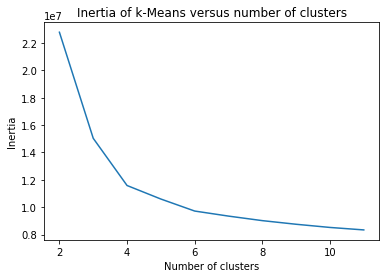

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

## 3.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Ejercicio: Probar con varios)

Definimos el hiperparametro bandwith por medio del estimador disponible en la librería sklearn.cluster (estimate_bandwidth), además escalamos los datos con StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

skills_scaled_matrix = StandardScaler().fit_transform(df_skills)

df_skills = pd.DataFrame(skills_scaled_matrix, index=df_skills.index, columns=df_skills.columns)

bandwidth = estimate_bandwidth(df_skills, quantile=0.005, n_samples=500, random_state=0)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : {} (bandwidth = {})".format(n_clusters_, bandwidth))

Cantidad de clusters encontrados por Mean Shift : 3 (bandwidth = 2.4387246176028485)


Graficamos los resultados:

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

skill_1=skills_ratings[6]
skill_2=skills_ratings[25]

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  3 clusters, según los hiperparámetros elegidos


**EVALUACIÓN, ANÁLISIS: Análisis exploratorio de los clusters, usando las clases/clusters asignadas por MeanShift** 

In [ ]:
#Cantidad de observaciones por Cluster
#Análisis descriptivo separando por Cluster
#Tabla de contingencia alguna categórica vs clusters
#Tabla de contingencia kmeans vs meanshift...
#otras ideas?


**Pregunta: normalizamos/estandarizamos la base?**

**Ahora vemos que agrupamientos se pueden hacer excluyendo los arqueros**

## 4.-Clustering-con-Kmeans-subpoblación

In [ ]:
set(df_skills.columns)

{'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'defending_marking_awareness',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'mentality_aggression',
 'mentality_composure',
 'mentality_interceptions',
 'mentality_penalties',
 'mentality_positioning',
 'mentality_vision',
 'movement_acceleration',
 'movement_agility',
 'movement_balance',
 'movement_reactions',
 'movement_sprint_speed',
 'power_jumping',
 'power_long_shots',
 'power_shot_power',
 'power_stamina',
 'power_strength',
 'skill_ball_control',
 'skill_curve',
 'skill_dribbling',
 'skill_fk_accuracy',
 'skill_long_passing'}

In [ ]:
n=10000
df_n=df.loc[:n]
df_n=df_n[(df_n["nation_position"]!='GK')&(df_n['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                  'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                  'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                  'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']

df_skills=df_n[skills_ratings]

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_

In [ ]:
#data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
%%script echo skipping
#en Jupyter:
plot(fig)

skipping


## 5.-Clustering-Mean-Shift-sin-arqueros 

In [ ]:
ms = MeanShift(bandwidth=2.01, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 4564


In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[26]
print(skill_1,skill_2)

skill_ball_control defending_marking_awareness


In [ ]:
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
%%script echo skipping
#En Jupyter
iplot(fig)

skipping


In [ ]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

In [ ]:
df_clusters.head(5)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  71                   95                          90   
2                  87                   95                          90   
3                  85                   83                          63   
4                  94                   82                          55   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       85                 89               85           79   
2                       80                 86               88           81   
3                       86                 86               95           88   
4                       94                 82               88           85   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  91                  96   
1                 85                  70                  88   
2                 84                  77                  88   
3                 87                  81                  95   
4                 83                  93                  91   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     77                     79                77   
2                     85                     88                86   
3                     93                     89                96   
4                     76                     76                79   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  93                82                90             85   
2                  94                74                94             95   
3                  89                84                80             64   
4                  91                78                91             63   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             76              86                87                    81   
2             77              77                93                    63   
3             81              53                81                    63   
4             89              74                91                    76   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   
3                       37                     86                90   
4                       66                     88                94   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   
3                   93                   93                           35   
4                   83                   89                           68   

   defending_standing_tackle  defending_sliding_tackle  kmeans  MeanShift  
0                         35                        24       1         32  
1                         42                        19       1       1192  
2                         32                        24       1         15  
3                         32                        29       1         35  
4                         65                        53       2          0

In [ ]:
df_clusters.head(5)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  71                   95                          90   
2                  87                   95                          90   
3                  85                   83                          63   
4                  94                   82                          55   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       85                 89               85           79   
2                       80                 86               88           81   
3                       86                 86               95           88   
4                       94                 82               88           85   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  91                  96   
1                 85                  70                  88   
2                 84                  77                  88   
3                 87                  81                  95   
4                 83                  93                  91   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     77                     79                77   
2                     85                     88                86   
3                     93                     89                96   
4                     76                     76                79   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  93                82                90             85   
2                  94                74                94             95   
3                  89                84                80             64   
4                  91                78                91             63   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             76              86                87                    81   
2             77              77                93                    63   
3             81              53                81                    63   
4             89              74                91                    76   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   
3                       37                     86                90   
4                       66                     88                94   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   
3                   93                   93                           35   
4                   83                   89                           68   

   defending_standing_tackle  defending_sliding_tackle  kmeans  MeanShift  
0                         35                        24       1         32  
1                         42                        19       1       1192  
2                         32                        24       1         15  
3                         32                        29       1         35  
4                         65                        53       2          0

**Análisis exploratorio de las clases**